# GeoJSON Thailand

## Installations

In [1]:
# !pip3 install --upgrade pip

In [2]:
# %pip install geopandas
# %pip install tabulate
# pip install contextily

## Imports

In [3]:
import sys

from tabulate import tabulate
import numpy as np
import pandas as pd

import geopandas

from shapely.geometry import box, Point

import folium

import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
%matplotlib inline

import contextily as cx

## Display Imports & Their Versions

In [4]:
headers = ["Software/Library", "Version"]

table_data = [
    ['Python', sys.version[0:6]],
    ['NumPy', np.__version__],
    ['Pandas', pd.__version__],
    ['GeoPandas', geopandas.__version__],
    ['Contextily', cx.__version__]
    ]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+--------------------+-----------+
| Software/Library   | Version   |
+====================+===========+
| Python             | 3.11.4    |
+--------------------+-----------+
| NumPy              | 1.26.4    |
+--------------------+-----------+
| Pandas             | 1.5.3     |
+--------------------+-----------+
| GeoPandas          | 1.0.1     |
+--------------------+-----------+
| Contextily         | 1.6.2     |
+--------------------+-----------+


## Import Dataset

In [5]:
gdf = geopandas.read_file("Thailand.json")

gdf

name                                           geometry
0          Mae Hong Son  POLYGON ((98.08593 19.77316, 98.11135 19.77714...
1              Chumphon  POLYGON ((99.27258 10.95801, 99.27754 10.95902...
2   Nakhon Si Thammarat  POLYGON ((100.34246 7.93878, 100.33778 7.93789...
3                Phuket  POLYGON ((98.41863 7.90375, 98.42189 7.90843, ...
4              Phangnga  MULTIPOLYGON (((98.53631 8.11514, 98.54054 8.1...
..                  ...                                                ...
72        Nakhon Phanom  POLYGON ((104.28198 17.86149, 104.28757 17.856...
73             Mukdahan  POLYGON ((104.30405 16.85308, 104.31676 16.857...
74           Narathiwat  POLYGON ((101.72075 6.57337, 101.7235 6.57438,...
75              Pattani  POLYGON ((101.7235 6.57438, 101.72075 6.57337,...
76            Bueng Kan  POLYGON ((103.46994 18.42198, 103.4748 18.4221...

[77 rows x 2 columns]

In [6]:
gdf.describe(include='all')

name                                           geometry
count             77                                                 77
unique            77                                                 77
top     Mae Hong Son  POLYGON ((98.0859298100001 19.773161112000082,...
freq               1                                                  1

### Rename Features as Needed

In [7]:
cols_to_rename = {
    "name": "province"
}

gdf.rename(columns=cols_to_rename, inplace=True)

gdf.head()

province                                           geometry
0         Mae Hong Son  POLYGON ((98.08593 19.77316, 98.11135 19.77714...
1             Chumphon  POLYGON ((99.27258 10.95801, 99.27754 10.95902...
2  Nakhon Si Thammarat  POLYGON ((100.34246 7.93878, 100.33778 7.93789...
3               Phuket  POLYGON ((98.41863 7.90375, 98.42189 7.90843, ...
4             Phangnga  MULTIPOLYGON (((98.53631 8.11514, 98.54054 8.1...

## Data Visualizations

### Non-Interactive Data Visualization

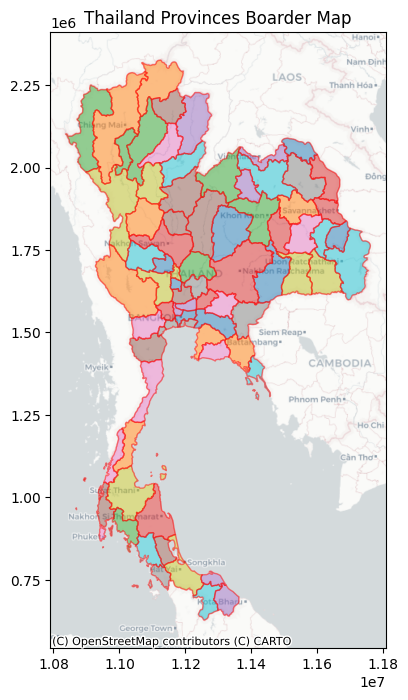

In [8]:
gdf_plot = gdf.to_crs(epsg=3857)

# gdf_plot['category'] = gdf_plot['state_name'].str[0]

fig, ax = plt.subplots(figsize=(24, 8))
gdf_plot.plot(column='province', ax=ax, alpha=0.5, edgecolor="red")

# ax.set_xlim(-20000000, -7000000)
# ax.set_ylim(1500000, 13000000)

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

ax.set_title("Thailand Provinces Boarder Map")

plt.show()

### Interactive Data Visualization

In [9]:
gdf.explore(
    m = folium.Map(
        location=[12.9, 105], 
        tiles='CartoDB Voyager', # CartoDB Voyager, OpenStreetMap
        zoom_start=5,
        prefer_canvas=True
        ),
    popup=True,
    highlight=True,
    legend=True,
    control_scale=True,
    style_kwds = {
        'stroke': True,
        'color': 'green',
        'weight': 1,
        'opacity': 0.75,
        'fill': True,
        'fillColor': '#88e788',
        'fillOpacity': 0.35
    },
    highlight_kwds ={
        'stroke': True,
        'color': 'red',
        'weight': 2,
        'opacity': 1,
        'fill': True,
        'fillColor': '#FF474C',
        'fillOpacity': 0.35
    },
    tooltip_kwds = {
        'labels': True,
        # 'aliases': ['State Name', 'State Code', 'Population']  
    }
)

## Methods & Attributes

### Append Geometry Feature to GeoDataFrame

In [10]:
print("Geometry Type")

gdf_gt = gdf.copy()
gdf_gt['geometry_type'] = gdf.geom_type

gdf_gt

Geometry Type


province                                           geometry  \
0          Mae Hong Son  POLYGON ((98.08593 19.77316, 98.11135 19.77714...   
1              Chumphon  POLYGON ((99.27258 10.95801, 99.27754 10.95902...   
2   Nakhon Si Thammarat  POLYGON ((100.34246 7.93878, 100.33778 7.93789...   
3                Phuket  POLYGON ((98.41863 7.90375, 98.42189 7.90843, ...   
4              Phangnga  MULTIPOLYGON (((98.53631 8.11514, 98.54054 8.1...   
..                  ...                                                ...   
72        Nakhon Phanom  POLYGON ((104.28198 17.86149, 104.28757 17.856...   
73             Mukdahan  POLYGON ((104.30405 16.85308, 104.31676 16.857...   
74           Narathiwat  POLYGON ((101.72075 6.57337, 101.7235 6.57438,...   
75              Pattani  POLYGON ((101.7235 6.57438, 101.72075 6.57337,...   
76            Bueng Kan  POLYGON ((103.46994 18.42198, 103.4748 18.4221...   

   geometry_type  
0        Polygon  
1        Polygon  
2        Polygon  
3        Polygon  
4   MultiPolygon  
..           ...  
72       Polygon  
73       Polygon  
74       Polygon  
75       Polygon  
76       Polygon  

[77 rows x 3 columns]

### Add Distance Features to Dataset

In [11]:
# Use the Harvard address coordinates as the reference point for distances

latitude = 42.3745
longitude = -71.1185

# Create a Shapely Point object
ref_point = Point(longitude, latitude)

if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)

# Estimate an appropriate UTM CRS for your GeoDataFrame
utm_crs = gdf.estimate_utm_crs()

# Reproject your GeoDataFrame to the estimated UTM CRS
gdf_projected = gdf.to_crs(utm_crs)

# Reproject the reference point to the same UTM CRS
ref_point_projected = geopandas.GeoSeries([ref_point], crs='EPSG:4326').to_crs(utm_crs).iloc[0]

In [12]:
# Calculate distances
gdf_projected['dist_from_harvard'] = gdf_projected['geometry'].distance(ref_point_projected)
gdf_projected['frechet_dist_from_harvard'] = gdf_projected['geometry'].frechet_distance(ref_point_projected)
gdf_projected['hausdorff_dist_from_harvard'] = gdf_projected['geometry'].hausdorff_distance(ref_point_projected)

gdf_projected

province                                           geometry  \
0          Mae Hong Son  POLYGON ((404244.106 2186638.049, 406910.029 2...   
1              Chumphon  POLYGON ((529781.619 1211350.452, 530323.55 12...   
2   Nakhon Si Thammarat  POLYGON ((647973.023 877769.852, 647457.782 87...   
3                Phuket  POLYGON ((435917.542 873702.436, 436277.083 87...   
4              Phangnga  MULTIPOLYGON (((448915.219 897055.869, 449380....   
..                  ...                                                ...   
72        Nakhon Phanom  POLYGON ((1060248.114 1982797.935, 1060856.856...   
73             Mukdahan  POLYGON ((1065695.456 1870909.016, 1067039.908...   
74           Narathiwat  POLYGON ((800884.886 727405.27, 801188.507 727...   
75              Pattani  POLYGON ((801188.507 727518.963, 800884.886 72...   
76            Bueng Kan  POLYGON ((972447.718 2042704.73, 972961.483 20...   

    dist_from_harvard  frechet_dist_from_harvard  hausdorff_dist_from_harvard  
0        1.308604e+07               1.333403e+07                 1.333403e+07  
1        1.406116e+07               1.421746e+07                 1.421746e+07  
2        1.425497e+07               1.442504e+07                 1.442504e+07  
3        1.437024e+07               1.441723e+07                 1.441723e+07  
4        1.422641e+07               1.440395e+07                 1.440395e+07  
..                ...                        ...                          ...  
72       1.332713e+07               1.347201e+07                 1.347201e+07  
73       1.345115e+07               1.353461e+07                 1.353461e+07  
74       1.456551e+07               1.466502e+07                 1.466502e+07  
75       1.452693e+07               1.457445e+07                 1.457445e+07  
76       1.327399e+07               1.335305e+07                 1.335305e+07  

[77 rows x 5 columns]

### Retrieve Coordinates

In [13]:
gdf_get_coords = gdf.get_coordinates(include_z=True)
gdf_count_coords = gdf.count_coordinates()
gdf_count_geos = gdf.count_geometries()

print(f"GDF Coordinates:\n{gdf_get_coords}\n")
print(f"GDF Count Coordinates:\n{gdf_count_coords}\n")
print(f"GDF Count Geometries:\n{gdf_count_geos}")

GDF Coordinates:
             x          y   z
0    98.085930  19.773161 NaN
0    98.111355  19.777140 NaN
0    98.132232  19.766056 NaN
0    98.172023  19.731562 NaN
0    98.205922  19.721485 NaN
..         ...        ...  ..
76  103.306851  18.425672 NaN
76  103.386640  18.441459 NaN
76  103.396768  18.441408 NaN
76  103.451545  18.425311 NaN
76  103.469942  18.421977 NaN

[26709 rows x 3 columns]

GDF Count Coordinates:
0     515
1     418
2     399
3      80
4     383
     ... 
72    344
73    221
74    151
75    156
76    330
Length: 77, dtype: int32

GDF Count Geometries:
0     1
1     1
2     1
3     1
4     7
     ..
72    1
73    1
74    1
75    1
76    1
Length: 77, dtype: int32


### Some Basic Functions

In [14]:
gdf_is_simple = gdf.is_simple
gdf_is_valid = gdf.is_valid
gdf_is_valid_reason = gdf.is_valid_reason()
gdf_has_z = gdf.has_z

gdf_is_simple_value_counts = gdf_is_simple.value_counts()
gdf_is_valid_value_counts = gdf_is_valid.value_counts()
gdf_is_valid_reason_value_counts = gdf_is_valid_reason.value_counts()
gdf_has_z_value_counts = gdf_has_z.value_counts()

print(f"is_simple:\n{gdf_is_simple_value_counts}\n")
print(f"is_valid:\n{gdf_is_valid_value_counts}\n")
print(f"is_valid_reason:\n{gdf_is_valid_reason_value_counts}\n")
print(f"has_z:\n{gdf_has_z_value_counts}\n")

is_simple:
True    77
dtype: int64

is_valid:
True    77
dtype: int64

is_valid_reason:
Valid Geometry    77
dtype: int64

has_z:
False    77
dtype: int64



### Check if Points Are Within Mapped Polygons

In [15]:
points_to_use = geopandas.GeoSeries([
    Point(-95.67804, 39.04833), # Topeka, Kansas, USA
    Point(-114.0719, 51.0447),  # Calgary, Alberta, Canada
    Point(80.0, -10.0),         # Midpoint in the Indian Ocean
    Point(-19.0208, 64.9631),   # Center of Iceland
    Point(31.1342, 29.9792),    # Pyramids of Giza, Egypt
    Point(86.9250, 27.9881),    # Mount Everest, Nepal
    Point(149.1300, -35.2809)   # Canberra, Australia (Capital City)
])

# Create a GeoDataFrame from points
points_to_use = geopandas.GeoDataFrame(geometry=points_to_use)

# Ensure both GeoDataFrames have the same CRS
points_to_use = points_to_use.set_crs(gdf.crs, allow_override=True)

# Perform spatial join to find points within polygons
points_within = geopandas.sjoin(points_to_use, gdf, predicate='within', how='inner')

print("points_within")
print(points_within)

points_within
Empty GeoDataFrame
Columns: [geometry, index_right, province]
Index: []


### Check if Above Listed Points Are NOT Within Mapped Polygons

In [16]:
points_not_within = points_to_use[~points_to_use.index.isin(points_within.index)]

print("points_not_within")
print(points_not_within)

points_not_within
                     geometry
0  POINT (-95.67804 39.04833)
1   POINT (-114.0719 51.0447)
2              POINT (80 -10)
3    POINT (-19.0208 64.9631)
4     POINT (31.1342 29.9792)
5      POINT (86.925 27.9881)
6     POINT (149.13 -35.2809)


### Some More Functions

In [17]:
gdf.boundary

0     LINESTRING (98.08593 19.77316, 98.11135 19.777...
1     LINESTRING (99.27258 10.95801, 99.27754 10.959...
2     LINESTRING (100.34246 7.93878, 100.33778 7.937...
3     LINESTRING (98.41863 7.90375, 98.42189 7.90843...
4     MULTILINESTRING ((98.53631 8.11514, 98.54054 8...
                            ...                        
72    LINESTRING (104.28198 17.86149, 104.28757 17.8...
73    LINESTRING (104.30405 16.85308, 104.31676 16.8...
74    LINESTRING (101.72075 6.57337, 101.7235 6.5743...
75    LINESTRING (101.7235 6.57438, 101.72075 6.5733...
76    LINESTRING (103.46994 18.42198, 103.4748 18.42...
Length: 77, dtype: geometry

In [18]:
gdf_projected.buffer(distance=125)

0     POLYGON ((404255.073 2186766.389, 406890.297 2...
1     POLYGON ((529772.355 1211476.177, 530268.903 1...
2     POLYGON ((648095.034 877797.02, 648097.134 877...
3     POLYGON ((435917.981 873921.956, 436174.47 874...
4     MULTIPOLYGON (((446219.403 1017554.958, 446083...
                            ...                        
72    POLYGON ((1035630.419 1969668.888, 1034760.378...
73    POLYGON ((1065682.54 1871039.547, 1066980.845 ...
74    POLYGON ((800862.362 727530.313, 801144.673 72...
75    POLYGON ((801292.757 727587.934, 801299.112 72...
76    POLYGON ((972453.957 2042830.382, 972945.658 2...
Length: 77, dtype: geometry

In [19]:
gdf_projected.centroid

0      POINT (397329.927 2073765.229)
1      POINT (507607.575 1145893.443)
2       POINT (585656.723 925566.477)
3       POINT (427429.226 881552.076)
4       POINT (436105.542 959232.633)
                   ...               
72    POINT (1078135.194 1928890.947)
73    POINT (1090301.463 1838638.532)
74      POINT (801203.703 682975.489)
75      POINT (760074.175 744584.905)
76     POINT (999859.048 2012760.063)
Length: 77, dtype: geometry

In [20]:
gdf.convex_hull

0     POLYGON ((97.90799 17.55487, 97.76895 17.67918...
1     POLYGON ((98.74982 9.60117, 98.66646 9.65572, ...
2     POLYGON ((100.12963 7.80172, 99.50476 7.87164,...
3     POLYGON ((98.30909 7.76773, 98.29184 7.77749, ...
4     POLYGON ((98.60353 7.90375, 98.58823 7.90493, ...
                            ...                        
72    POLYGON ((104.7339 16.74942, 104.72491 16.7509...
73    POLYGON ((104.81286 16.19064, 104.63613 16.214...
74    POLYGON ((101.78415 5.7381, 101.66592 5.76559,...
75    POLYGON ((101.56773 6.54319, 101.34196 6.5495,...
76    POLYGON ((103.97105 17.76806, 103.96872 17.768...
Length: 77, dtype: geometry

In [21]:
gdf.envelope

0     POLYGON ((97.3514 17.55487, 98.65499 17.55487,...
1     POLYGON ((98.63546 9.60117, 99.51531 9.60117, ...
2     POLYGON ((99.2408 7.80172, 100.34246 7.80172, ...
3     POLYGON ((98.25416 7.76773, 98.43979 7.76773, ...
4     POLYGON ((97.8353 7.90375, 98.71328 7.90375, 9...
                            ...                        
72    POLYGON ((103.98841 16.74942, 104.81999 16.749...
73    POLYGON ((104.07285 16.19064, 104.98803 16.190...
74    POLYGON ((101.38201 5.7381, 102.07311 5.7381, ...
75    POLYGON ((101.03769 6.54319, 101.7235 6.54319,...
76    POLYGON ((103.23368 17.76806, 104.20333 17.768...
Length: 77, dtype: geometry

In [22]:
gdf.extract_unique_points()

0     MULTIPOINT (98.08593 19.77316, 98.11135 19.777...
1     MULTIPOINT (99.27258 10.95801, 99.27754 10.959...
2     MULTIPOINT (100.34246 7.93878, 100.33778 7.937...
3     MULTIPOINT (98.41863 7.90375, 98.42189 7.90843...
4     MULTIPOINT (98.53631 8.11514, 98.54054 8.10493...
                            ...                        
72    MULTIPOINT (104.28198 17.86149, 104.28757 17.8...
73    MULTIPOINT (104.30405 16.85308, 104.31676 16.8...
74    MULTIPOINT (101.72075 6.57337, 101.7235 6.5743...
75    MULTIPOINT (101.7235 6.57438, 101.72075 6.5733...
76    MULTIPOINT (103.46994 18.42198, 103.4748 18.42...
Length: 77, dtype: geometry

### Set-Theoretic Methods

In [23]:
gdf.force_2d()

0     POLYGON ((98.08593 19.77316, 98.11135 19.77714...
1     POLYGON ((99.27258 10.95801, 99.27754 10.95902...
2     POLYGON ((100.34246 7.93878, 100.33778 7.93789...
3     POLYGON ((98.41863 7.90375, 98.42189 7.90843, ...
4     MULTIPOLYGON (((98.53631 8.11514, 98.54054 8.1...
                            ...                        
72    POLYGON ((104.28198 17.86149, 104.28757 17.856...
73    POLYGON ((104.30405 16.85308, 104.31676 16.857...
74    POLYGON ((101.72075 6.57337, 101.7235 6.57438,...
75    POLYGON ((101.7235 6.57438, 101.72075 6.57337,...
76    POLYGON ((103.46994 18.42198, 103.4748 18.4221...
Length: 77, dtype: geometry

In [24]:
gdf.minimum_bounding_circle()

0     POLYGON ((99.13636 18.67937, 99.11467 18.45914...
1     POLYGON ((99.91978 10.29911, 99.90454 10.14437...
2     POLYGON ((100.63599 8.53698, 100.62087 8.38345...
3     POLYGON ((98.50774 7.97976, 98.50366 7.93831, ...
4     POLYGON ((99.10343 8.6884, 99.08679 8.5195, 99...
                            ...                        
72    POLYGON ((105.12885 17.37519, 105.11546 17.239...
73    POLYGON ((105.0614 16.56328, 105.0512 16.45969...
74    POLYGON ((102.16127 6.18376, 102.15255 6.0953,...
75    POLYGON ((101.7414 6.68634, 101.7345 6.6163, 1...
76    POLYGON ((104.23181 18.18721, 104.22195 18.087...
Length: 77, dtype: geometry

In [25]:
gdf.minimum_clearance()

0     0.000088
1     0.000013
2     0.000004
3     0.003422
4     0.000114
        ...   
72    0.000263
73    0.000221
74    0.000029
75    0.000028
76    0.000682
Length: 77, dtype: float64

In [26]:
gdf.minimum_rotated_rectangle()

0     POLYGON ((97.6912 19.90331, 97.14896 17.74562,...
1     POLYGON ((99.00462 11.16368, 98.50948 9.68146,...
2     POLYGON ((98.90546 8.94294, 99.50541 7.53561, ...
3     POLYGON ((98.25329 8.19171, 98.2547 7.76755, 9...
4     POLYGON ((98.9973 8.05186, 98.38954 9.66776, 9...
                            ...                        
72    POLYGON ((105.02048 16.86252, 104.50481 18.152...
73    POLYGON ((104.05795 16.85801, 104.42931 16.010...
74    POLYGON ((102.18808 6.21806, 101.61622 6.65666...
75    POLYGON ((101.79167 6.81693, 101.10106 7.01106...
76    POLYGON ((104.28036 18.20382, 103.33444 18.597...
Length: 77, dtype: geometry

In [27]:
gdf.normalize()

0     POLYGON ((97.3514 18.55117, 97.3729 18.54862, ...
1     POLYGON ((98.63546 9.76349, 98.63546 9.76992, ...
2     POLYGON ((99.2408 8.38052, 99.2408 8.38843, 99...
3     POLYGON ((98.25416 7.92829, 98.25864 7.9383, 9...
4     MULTIPOLYGON (((98.19801 8.55606, 98.20297 8.5...
                            ...                        
72    POLYGON ((103.98841 17.86749, 103.98841 17.872...
73    POLYGON ((104.07285 16.83259, 104.10117 16.837...
74    POLYGON ((101.38201 6.20035, 101.38387 6.20469...
75    POLYGON ((101.03769 6.74827, 101.04125 6.79829...
76    POLYGON ((103.23368 18.34927, 103.23399 18.355...
Length: 77, dtype: geometry

In [28]:
gdf.active_geometry_name

'geometry'

### Display Translated (Shifted) Map

In [29]:
translated_gdf = gdf.translate(xoff=2.5, yoff=-2.5)

translated_gdf.explore()

### Add Distance Features to Dataset

In [30]:
# Use the Harvard address coordinates as the reference point for distances

latitude = 42.3745
longitude = -71.1185

# Create a Shapely Point object
ref_point = Point(longitude, latitude)

if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)

# Estimate an appropriate UTM CRS for your GeoDataFrame
utm_crs = gdf.estimate_utm_crs()

# Reproject your GeoDataFrame to the estimated UTM CRS
gdf_projected = gdf.to_crs(utm_crs)

# Reproject the reference point to the same UTM CRS
ref_point_projected = geopandas.GeoSeries([ref_point], crs='EPSG:4326').to_crs(utm_crs).iloc[0]

In [31]:
# Calculate distances
gdf_projected['dist_from_harvard'] = gdf_projected['geometry'].distance(ref_point_projected)
gdf_projected['frechet_dist_from_harvard'] = gdf_projected['geometry'].frechet_distance(ref_point_projected)
gdf_projected['hausdorff_dist_from_harvard'] = gdf_projected['geometry'].hausdorff_distance(ref_point_projected)

gdf_projected

province                                           geometry  \
0          Mae Hong Son  POLYGON ((404244.106 2186638.049, 406910.029 2...   
1              Chumphon  POLYGON ((529781.619 1211350.452, 530323.55 12...   
2   Nakhon Si Thammarat  POLYGON ((647973.023 877769.852, 647457.782 87...   
3                Phuket  POLYGON ((435917.542 873702.436, 436277.083 87...   
4              Phangnga  MULTIPOLYGON (((448915.219 897055.869, 449380....   
..                  ...                                                ...   
72        Nakhon Phanom  POLYGON ((1060248.114 1982797.935, 1060856.856...   
73             Mukdahan  POLYGON ((1065695.456 1870909.016, 1067039.908...   
74           Narathiwat  POLYGON ((800884.886 727405.27, 801188.507 727...   
75              Pattani  POLYGON ((801188.507 727518.963, 800884.886 72...   
76            Bueng Kan  POLYGON ((972447.718 2042704.73, 972961.483 20...   

    dist_from_harvard  frechet_dist_from_harvard  hausdorff_dist_from_harvard  
0        1.308604e+07               1.333403e+07                 1.333403e+07  
1        1.406116e+07               1.421746e+07                 1.421746e+07  
2        1.425497e+07               1.442504e+07                 1.442504e+07  
3        1.437024e+07               1.441723e+07                 1.441723e+07  
4        1.422641e+07               1.440395e+07                 1.440395e+07  
..                ...                        ...                          ...  
72       1.332713e+07               1.347201e+07                 1.347201e+07  
73       1.345115e+07               1.353461e+07                 1.353461e+07  
74       1.456551e+07               1.466502e+07                 1.466502e+07  
75       1.452693e+07               1.457445e+07                 1.457445e+07  
76       1.327399e+07               1.335305e+07                 1.335305e+07  

[77 rows x 5 columns]

### Add Distance Features to Dataset

In [32]:
# Use the Harvard address coordinates as the reference point for distances

latitude = 42.3745
longitude = -71.1185

# Create a Shapely Point object
ref_point = Point(longitude, latitude)

if gdf.crs is None:
    gdf.set_crs(epsg=4326, inplace=True)

# Estimate an appropriate UTM CRS for your GeoDataFrame
utm_crs = gdf.estimate_utm_crs()

# Reproject your GeoDataFrame to the estimated UTM CRS
gdf_projected = gdf.to_crs(utm_crs)

# Reproject the reference point to the same UTM CRS
ref_point_projected = geopandas.GeoSeries([ref_point], crs='EPSG:4326').to_crs(utm_crs).iloc[0]

In [33]:
# Calculate distances
gdf_projected['dist_from_harvard'] = gdf_projected['geometry'].distance(ref_point_projected)
gdf_projected['frechet_dist_from_harvard'] = gdf_projected['geometry'].frechet_distance(ref_point_projected)
gdf_projected['hausdorff_dist_from_harvard'] = gdf_projected['geometry'].hausdorff_distance(ref_point_projected)

gdf_projected

province                                           geometry  \
0          Mae Hong Son  POLYGON ((404244.106 2186638.049, 406910.029 2...   
1              Chumphon  POLYGON ((529781.619 1211350.452, 530323.55 12...   
2   Nakhon Si Thammarat  POLYGON ((647973.023 877769.852, 647457.782 87...   
3                Phuket  POLYGON ((435917.542 873702.436, 436277.083 87...   
4              Phangnga  MULTIPOLYGON (((448915.219 897055.869, 449380....   
..                  ...                                                ...   
72        Nakhon Phanom  POLYGON ((1060248.114 1982797.935, 1060856.856...   
73             Mukdahan  POLYGON ((1065695.456 1870909.016, 1067039.908...   
74           Narathiwat  POLYGON ((800884.886 727405.27, 801188.507 727...   
75              Pattani  POLYGON ((801188.507 727518.963, 800884.886 72...   
76            Bueng Kan  POLYGON ((972447.718 2042704.73, 972961.483 20...   

    dist_from_harvard  frechet_dist_from_harvard  hausdorff_dist_from_harvard  
0        1.308604e+07               1.333403e+07                 1.333403e+07  
1        1.406116e+07               1.421746e+07                 1.421746e+07  
2        1.425497e+07               1.442504e+07                 1.442504e+07  
3        1.437024e+07               1.441723e+07                 1.441723e+07  
4        1.422641e+07               1.440395e+07                 1.440395e+07  
..                ...                        ...                          ...  
72       1.332713e+07               1.347201e+07                 1.347201e+07  
73       1.345115e+07               1.353461e+07                 1.353461e+07  
74       1.456551e+07               1.466502e+07                 1.466502e+07  
75       1.452693e+07               1.457445e+07                 1.457445e+07  
76       1.327399e+07               1.335305e+07                 1.335305e+07  

[77 rows x 5 columns]

### Iterate Through All Rows

In [34]:
for index, row in gdf.iterrows():
    print("All Data:", row)

All Data: province                                         Mae Hong Son
geometry    POLYGON ((98.0859298100001 19.773161112000082,...
Name: 0, dtype: object
All Data: province                                             Chumphon
geometry    POLYGON ((99.27257653168158 10.95801361753442,...
Name: 1, dtype: object
All Data: province                                  Nakhon Si Thammarat
geometry    POLYGON ((100.34245933417458 7.938784496738819...
Name: 2, dtype: object
All Data: province                                               Phuket
geometry    POLYGON ((98.4186304050001 7.903753973000079, ...
Name: 3, dtype: object
All Data: province                                             Phangnga
geometry    MULTIPOLYGON (((98.53630618600008 8.1151390650...
Name: 4, dtype: object
All Data: province                                               Ranong
geometry    MULTIPOLYGON (((98.41667728000007 9.7334658870...
Name: 5, dtype: object
All Data: province                                        

### Iterate Through All Features

In [35]:
for feature in gdf.iterfeatures():
    print(feature)

{'id': '0', 'type': 'Feature', 'properties': {'province': 'Mae Hong Son'}, 'geometry': {'type': 'Polygon', 'coordinates': (((98.0859298100001, 19.773161112000082), (98.1113546150001, 19.77714019800007), (98.13223189300004, 19.76605560300007), (98.1720227460001, 19.731561584000104), (98.20592248500009, 19.72148468100005), (98.21326053900009, 19.71776397800005), (98.21791141800003, 19.70797129300007), (98.21667118300007, 19.68745575000011), (98.21915165200005, 19.676991272000066), (98.23754846200006, 19.664692281000043), (98.26276656200014, 19.669859924000036), (98.30731164500003, 19.689987895000087), (98.34761926300007, 19.690633851000086), (98.39443811100011, 19.686344706000114), (98.43960331200009, 19.68773997000008), (98.47453658000006, 19.705309957000054), (98.47780068602651, 19.705629272236536), (98.47619103358932, 19.693707791081664), (98.47934329585644, 19.673295599812064), (98.48259891181033, 19.664097195429264), (98.49066043463137, 19.653115953438515), (98.49934207597602, 19.64

### Interface

In [36]:
gdf.__geo_interface__

{'type': 'FeatureCollection',
 'features': [{'id': '0',
   'type': 'Feature',
   'properties': {'province': 'Mae Hong Son'},
   'geometry': {'type': 'Polygon',
    'coordinates': (((98.0859298100001, 19.773161112000082),
      (98.1113546150001, 19.77714019800007),
      (98.13223189300004, 19.76605560300007),
      (98.1720227460001, 19.731561584000104),
      (98.20592248500009, 19.72148468100005),
      (98.21326053900009, 19.71776397800005),
      (98.21791141800003, 19.70797129300007),
      (98.21667118300007, 19.68745575000011),
      (98.21915165200005, 19.676991272000066),
      (98.23754846200006, 19.664692281000043),
      (98.26276656200014, 19.669859924000036),
      (98.30731164500003, 19.689987895000087),
      (98.34761926300007, 19.690633851000086),
      (98.39443811100011, 19.686344706000114),
      (98.43960331200009, 19.68773997000008),
      (98.47453658000006, 19.705309957000054),
      (98.47780068602651, 19.705629272236536),
      (98.47619103358932, 19.6937077

## Save Cleaned Dataset to File

In [37]:
new_file_name_and_path = 'cleaned_gdf_file.geojson'

gdf.to_file(new_file_name_and_path, driver="geojson")

### Resources Used (links to libraries used in this project)

- GeoPandas: https://geopandas.org/en/stable/